# ATAC-seq clustering and chromatin analysis

## 1. Cell type clustering 

**Goal**: Visualize sample relationships by signal similarity

In [41]:
import pandas as pd

# Load both matrices 
peak_matrix = pd.read_csv("ATAC-seq/filtered_ATAC_abT_Tact_Stem.csv")
signal_matrix = peak_matrix.iloc[:, 8:] # exclude the first 8 columns since they are annotations and we don't need them

signal_matrix.head()


,preT.DN1.Th,preT.DN2a.Th,preT.DN2b.Th,preT.DN3.Th,T.DN4.Th,T.ISP.Th,T.DP.Th,T.4.Th,T.8.Th,T.4.Nve.Sp,...,T8.Tcm.LCMV.d180.Sp,T8.Tem.LCMV.d180.Sp,NKT.Sp,NKT.Sp.LPS.3hr,NKT.Sp.LPS.18hr,NKT.Sp.LPS.3d,LTHSC.34-.BM,LTHSC.34+.BM,STHSC.150-.BM,MPP4.135+.BM
0,0.11,0.77,0.51,0.49,0.58,0.11,0.67,0.11,1.09,3.23,...,0.71,2.78,0.56,0.11,0.64,1.14,0.41,0.71,0.90,0.11
1,0.77,0.77,0.47,1.56,1.02,0.11,0.73,0.91,0.53,0.84,...,0.94,3.56,0.98,2.12,0.12,0.11,0.41,1.64,0.90,0.83
2,0.40,0.77,0.11,0.10,0.35,0.53,1.08,0.11,0.11,2.04,...,1.32,2.79,0.56,1.72,0.12,0.11,2.36,0.10,0.90,0.11
3,0.46,0.11,0.47,0.10,0.58,0.11,0.17,2.15,0.53,1.25,...,3.41,0.11,2.86,0.11,0.64,2.20,0.41,0.10,0.11,0.11
4,0.77,0.84,1.34,1.69,0.34,0.94,0.40,0.39,0.54,1.89,...,0.94,0.11,1.59,0.51,0.12,0.53,0.41,0.10,0.11,0.11


To run a PCA / UMAP / t-SNE test the dataset should be a numeric matrix which is the case here, however the rows have to represent samples and the columns featurs. This means we first need to transpose the matrix.

In [44]:
import pandas as pd
transposed = signal_matrix.T
transposed.head()

,0,1,2,3,4,5,6,7,8,9,...,512585,512586,512587,512588,512589,512590,512591,512592,512593,512594
preT.DN1.Th,0.11,0.77,0.40,0.46,0.77,0.77,0.40,0.76,0.40,0.11,...,12.97,3.95,2.05,2.09,1.76,3.32,3.56,0.76,0.81,1.61
preT.DN2a.Th,0.77,0.77,0.77,0.11,0.84,0.77,0.84,1.17,0.77,0.43,...,16.90,6.57,3.55,4.64,2.59,5.06,5.76,1.93,0.77,2.44
preT.DN2b.Th,0.51,0.47,0.11,0.47,1.34,0.47,0.47,0.51,0.87,0.99,...,17.03,2.14,5.22,4.17,2.55,3.37,8.18,0.87,0.47,1.78
preT.DN3.Th,0.49,1.56,0.10,0.10,1.69,1.02,0.10,1.14,0.10,0.10,...,9.20,6.41,8.11,7.10,4.00,4.55,10.40,1.56,0.61,1.02
T.DN4.Th,0.58,1.02,0.35,0.58,0.34,0.10,0.58,0.35,0.78,0.35,...,17.73,7.79,6.82,6.93,10.15,8.41,15.50,0.78,0.79,2.38


Now that we have the transposed matrix, we can run the PCA / UMAP and t-SNE tests.

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
# Running PCA
subset = transposed
pca = PCA(n_components=2)
pca_result = pca.fit_transform(subset)

pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"], index=subset.index)
print(pca_df.head())

                    PC1        PC2
preT.DN1.Th   61.684345  -0.539943
preT.DN2a.Th  49.364543 -12.949549
preT.DN2b.Th  27.693019 -21.304111
preT.DN3.Th   17.528304   3.175134
T.DN4.Th      -8.670444  -3.273049


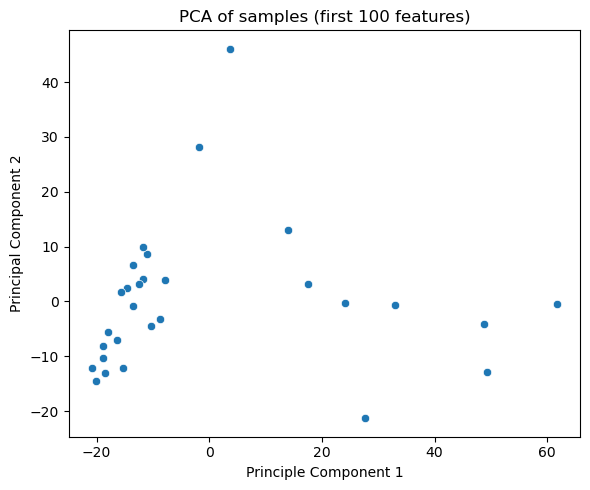

In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.figure(figsize=(6, 5))
sns.scatterplot(data=pca_df, x="PC1", y="PC2")
plt.title("PCA of samples")
plt.xlabel("Principle Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()

In [48]:
import umap.umap_ as umap

# Running UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(subset)

umap_df = pd.DataFrame(umap_result, columns=["UMAP1", "UMAP2"], index=subset.index)
print(umap_df.head())


c:\Users\kalin_p\miniconda3\envs\REAL_FORKED_Bioinfo_project\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


                  UMAP1      UMAP2
preT.DN1.Th  -11.441296  10.803467
preT.DN2a.Th -11.763563  10.448591
preT.DN2b.Th -11.210615  10.265947
preT.DN3.Th  -11.079668   9.750950
T.DN4.Th     -12.702637   8.573036


In [49]:
from sklearn.manifold import TSNE

# Running t-SNE
tsne_model = TSNE(n_components=2, random_state=42, perplexity=10)
tsne_result = tsne_model.fit_transform(subset)

tsne_df = pd.DataFrame(tsne_result, columns=["tSNE1", "tSNE2"], index=subset.index)
print(tsne_df.head())

                  tSNE1      tSNE2
preT.DN1.Th   28.513390  28.012327
preT.DN2a.Th  30.023066  22.964714
preT.DN2b.Th  27.062199  16.670519
preT.DN3.Th   23.208231  14.722278
T.DN4.Th      -0.841659   8.683807


<function matplotlib.pyplot.show(close=None, block=None)>

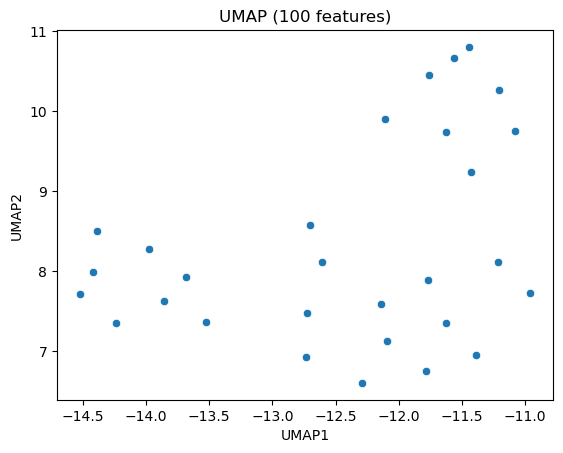

In [ ]:

# Plotting UMAP
sns.scatterplot(data=umap_df, x="UMAP1", y="UMAP2")
plt.title("UMAP")
plt.show


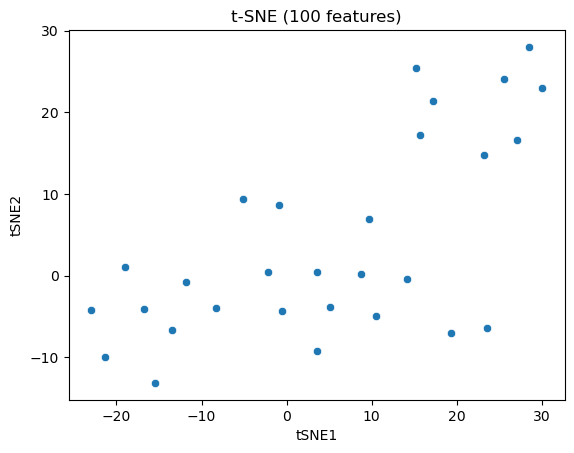

In [ ]:
# Plotting t-SNE
sns.scatterplot(data=tsne_df, x="tSNE1", y="tSNE2")
plt.title("t-SNE")
plt.show()